#**Credit Card Risk Prediction**

https://colab.research.google.com/drive/19u_Cux1v1bhAbNYuIznNZLZ7wuecfmWK#scrollTo=rxpeVFFfXDnm

**Created By**:

Victoria Carlsten,
Jacob Rose,
Kendall Sims,
Michael Webber

## **Introduction**

### **Executive Summary**

This project focuses on developing a predictive model to assess the likelihood of credit card application approval, utilizing a comprehensive dataset of applicant demographic, financial, and credit history information. By automating the approval process, financial institutions can streamline decision-making, minimize risks, and enhance revenue generation from their card divisions.

The final predictive solution will not only enable financial institutions to make objective, consistent decisions but also contribute to operational efficiency and stronger portfolio health.

*Key Findings:*

1) Imbalanced Data Handling
Handling imbalance with techniques like SMOTE, ADASYN, and class weighting
Used balanced accuracy to fairly evaluate model performance

2) Practical Application
We finalized logistic regression for its simplicity and accuracy in predicting high-risk credit applicants. This model can streamline credit approval processes, reduce defaults, and enable financial institutions to tailor products for low-risk applicants efficiently

3) Model Selection
Evaluated several models, including Logistic Regression, Random Forest, XGBoost, Decision Trees, SVM, and KNN, to understand their performance across metrics like balanced accuracy, precision, recall, and confusion matrices


###**Problem Definition**

We are building a predictive model to assess the likelihood of credit card application approval, using applicant demographic, financial, and credit history data. This will enable financial institutions to streamline decision-making, minimize risk, increase their overall revenues from their card division and improve approval accuracy.

---

**Description of Data and Source:**

Credit Card Approval Prediction
Created By: Youssef Elbadry

https://www.kaggle.com/datasets/youssefelbadry10/credit-card-approval?select=train_data.csv

Our dataset initially contains 36,456 rows, 20 columns, and includes a mix of both numerical (e.g., Age, Income, Employment Length) and categorical variables (e.g., Gender, Job title).

### **Motivation**

By automating the approval process through predictive analytics, financial institutions can streamline decision-making and evaluate applications more efficiently. Reduced processing times could also lead to improved customer satisfaction, as applicants receive faster decisions on their applications. A data-driven approach provides a more accurate assessment of an applicant’s creditworthiness, leading to more fair and consistent approval decisions, minimizing potential biases. Lastly, the model enables institutions to reduce default rates, improving the overall health of their loan portfolios.

### **Importing Required Packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, VarianceThreshold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score, confusion_matrix
from collections import Counter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### **Data Dictionary**

**Credit Card Approval Prediction Dataset**
- Contains 36,456 rows and 20 columns

**Data Dictionary**
* ID (Numeric): A unique identifier for each applicant.
* Gender (Categorical): The gender of the applicant (e.g., Male, Female).
* Has a car (Categorical): Indicates whether the applicant owns a car (Yes/No).
* Has a property (Categorical): Indicates whether the applicant owns property (Yes/No).
* Children count (Numeric): The number of children the applicant has.
* Income (Numeric): The applicant's monthly income in US dollars.
* Age (Numeric): The age of the applicant in days.
* Employment length (Numeric): The number of days the applicant has been employed.
* Family member count (Numeric): The total number of family members dependent on the applicant.
* Account age (Numeric): The age of the applicant's financial account in days.
* Employment status (Categorical): The current employment type/status of the applicant (e.g., Employed, Unemployed).
* Education level (Categorical): The highest level of education achieved by the applicant.
* Marital status (Categorical): The marital status of the applicant (e.g., Single, Married).
* Dwelling (Categorical): The type of residence the applicant lives in (e.g., Owned, Rented).
* Has a mobile phone (Categorical): Indicates if the applicant owns a mobile phone (Yes/No).
* Has a work phone (Categorical): Indicates if the applicant has a phone provided by their employer (Yes/No).
* Has a phone (Categorical): Indicates if the applicant has a personal landline phone (Yes/No).
* Has an email (Categorical): Indicates if the applicant has an email address (Yes/No).
* Job title (Categorical): The occupation or job designation of the applicant.
* Is high risk (Binary): The target variable indicating whether the applicant is considered high credit risk (Yes/No).


## **Data Cleaning and Concatenation**

### **Dealing With Null Values and Feature Selection**

In [ ]:
file_url_train = 'https://drive.google.com/uc?export=download&id=1pCtrmGlV3n87xVNHSfH__4bUMtPM_iiT'

file_url_test = 'https://drive.google.com/uc?export=download&id=1hiGlgDq1m6my5VQJCkmWLGdQvvbYuEwk'

original = pd.read_csv(file_url_train)

additional = pd.read_csv(file_url_test)

data = pd.concat([original, additional], ignore_index=True)

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

,0
ID,0
Gender,0
Has a car,0
Has a property,0
Children count,0
Income,0
Employment status,0
Education level,0
Marital status,0
Dwelling,0


In [ ]:
# Filter for missing job titles and unemployment status, excluding pensioners
filtered_data = data[
    data['Job title'].isna() &  # Check for NaN in Job title
    (data['Employment length'] < 0) &  # Check for unemployment (negative employment length)
    (data['Employment status'] != 'Pensioner')  # Exclude pensioners
]

# Count the number of people matching the criteria
count = filtered_data.shape[0]

# Update job title to "Retired" for pensioners with no job title
data.loc[
    data['Job title'].isna() & (data['Employment status'] == 'Pensioner'),
    'Job title'
] = 'Retired'

# Verify the updates
print(data[data['Job title'] == 'Retired'])

            ID Gender Has a car Has a property  Children count    Income  \
8      5113922      F         N              N               0   90000.0   
10     5061509      F         N              Y               0  202500.0   
25     5067899      F         N              Y               0  270000.0   
34     5148624      F         N              Y               0   99000.0   
37     5010039      F         N              Y               0  292500.0   
...        ...    ...       ...            ...             ...       ...   
36429  5054377      F         N              N               0  157500.0   
36432  5105567      M         N              Y               0  135000.0   
36441  5021303      M         N              N               1  472500.0   
36444  5067923      F         N              Y               0  112500.0   
36451  5061507      F         N              Y               0  202500.0   

      Employment status                Education level        Marital status  \
8      

<Axes: >

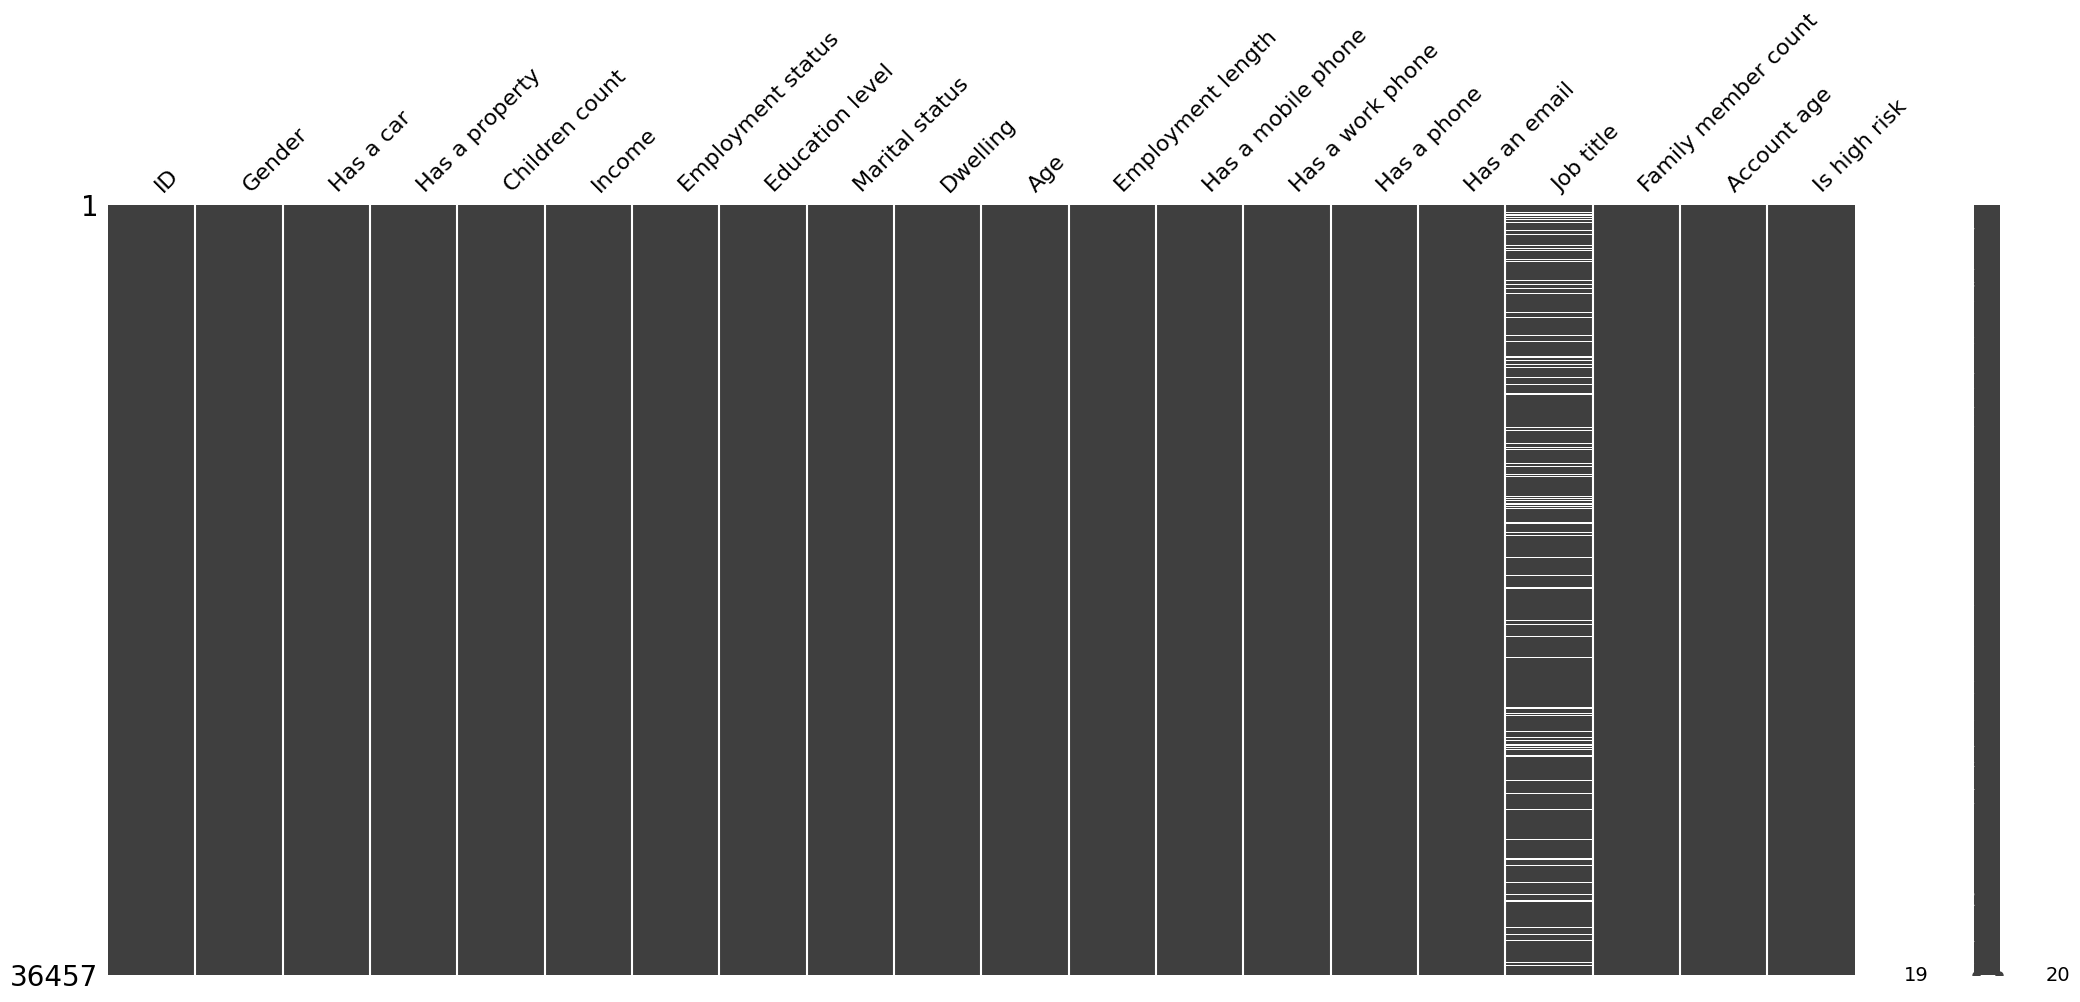

In [ ]:
msno.matrix(data)

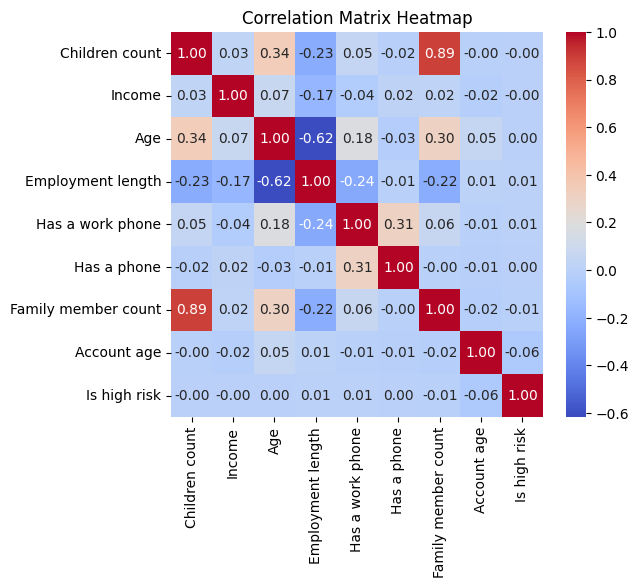

In [ ]:
data_numerical2 = data[['Children count', 'Income', 'Age', 'Employment length', 'Has a work phone', 'Has a phone', 'Family member count', 'Account age', 'Is high risk']]

plt.figure(figsize=(6, 5))  # Adjust figure size if needed
sns.heatmap(data_numerical2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Question It Solves:**

How are various numerical factors in credit card risk (like age, family size etc.) correlated with each other in the context of application approval?

**Key insights:**

In [ ]:
dropnans = data.dropna(subset=['Job title'])
dropnans.isnull().sum()

,0
ID,0
Gender,0
Has a car,0
Has a property,0
Children count,0
Income,0
Employment status,0
Education level,0
Marital status,0
Dwelling,0


In [ ]:
# Convert from days since birth to regular age

data['Age'] = (data['Age'].abs() / 365).round(2)

In [ ]:
missing_job_title_df = data[data['Job title'].isna()]

age_stats = missing_job_title_df['Age'].describe()
income_stats = missing_job_title_df['Income'].describe()

print("Age Stats for Missing Job Title:\n", age_stats)
print("\nIncome Stats for Missing Job Title:\n", income_stats)

Age Stats for Missing Job Title:
 count    5184.000000
mean       40.675386
std         9.854512
min        22.180000
25%        32.390000
50%        39.990000
75%        48.347500
max        66.780000
Name: Age, dtype: float64

Income Stats for Missing Job Title:
 count      5184.000000
mean     192216.938368
std      104294.315736
min       38700.000000
25%      126000.000000
50%      162000.000000
75%      225000.000000
max      900000.000000
Name: Income, dtype: float64


In [ ]:
# If they are 60+ and have no title listed --> fill in as retired
# If the job title col is missing and their employment length is positive --> unemployed
data.loc[(data['Job title'].isna()) & (data['Employment status'] == 'Pensioner'), 'Job title'] = 'Retired'
data.loc[data['Job title'].isnull() & (data['Employment length'] > 0), 'Job title'] = 'Unemployed'
data.loc[data['Job title'].isnull() & (data['Employment length'] < 0), 'Job title'] = 'Other'

data.isnull().sum()

,0
ID,0
Gender,0
Has a car,0
Has a property,0
Children count,0
Income,0
Employment status,0
Education level,0
Marital status,0
Dwelling,0


In [ ]:
# Define categorical and numerical features
categorical_features = ['Gender', 'Has a car', 'Has a property', 'Employment status',
                        'Education level', 'Marital status', 'Dwelling',
                        'Has a mobile phone', 'Has a work phone',
                        'Has a phone', 'Has an email', 'Job title']

numerical_features = ['Income', 'Age', 'Employment length', 'Account age']

combined_data_path = 'https://drive.google.com/uc?export=download&id=1-3_wDiLgNwfj13U0-yAMa59yLm3Q6S48'
combined_data = pd.read_csv(combined_data_path)

# Display missing values
print("\nMissing Values:")
print(combined_data.isnull().sum())

# Drop columns with excessive missing values (threshold set to 50%)
missing_threshold = 0.5
combined_data = combined_data.drop(columns=combined_data.columns[combined_data.isnull().mean() > missing_threshold])

# Fill missing values in numerical columns with median
for col in numerical_features:
    if col in combined_data.columns:
        combined_data[col].fillna(combined_data[col].median(), inplace=True)

# Fill missing values in categorical columns with mode
for col in categorical_features:
    if col in combined_data.columns:
        combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
categorical_encoded = combined_data[categorical_features].apply(label_encoder.fit_transform)

# Perform chi-square test
chi2_scores, p_values = chi2(categorical_encoded, combined_data['Is high risk'])  # Replace with your target variable
chi2_results = pd.DataFrame({'Feature': categorical_features, 'Chi2_Score': chi2_scores, 'p-value': p_values})

# Display chi-square results
print("\nChi-Square Test Results:")
print(chi2_results)

# Scale numerical features
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(combined_data[numerical_features])

# Apply VarianceThreshold
variance_selector = VarianceThreshold(threshold=0.01)
low_variance_features = [col for col, var in zip(numerical_features, variance_selector.fit(scaled_numerical).variances_) if var < 0.01]

# Drop low-variance features
combined_data = combined_data.drop(columns=low_variance_features)

# Display selected features
print("\nSelected Features:")
print(combined_data.columns)


Missing Values:
ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

Chi-Square Test Results:
               Feature  Chi2_Score   p-value
0               Gender    5.711110  0.016858
1            Has a car    0.426758  0.513584
2       Has a property    5.913471  0.015026
3    Employment status    1.670908  0.196137
4      Education level    0.575325  0.448151
5       Marital status   10.989396  0.000916
6             Dwelling    0.002042  0.963955
7   Has a mobile phone         NaN       NaN
8     Has a work phone    0.900444  0.3

*Features to Keep:*

* Gender: Chi2_Score = 5.711110, p-value = 0.016858
* Has a property: Chi2_Score = 5.913471, p-value = 0.015026
* Marital status: Chi2_Score = 10.989396, p-value = 0.000916
* Job title: Chi2_Score = 7.608440, p-value = 0.005810

*Features to Drop:*

These features have p-values > 0.05, indicating no significant relationship with the target variable.

* Has a car
* Employment status
* Education level
* Dwelling
* Has a work phone
* Has a phone
* Has an email


### **Preliminary Visualization**

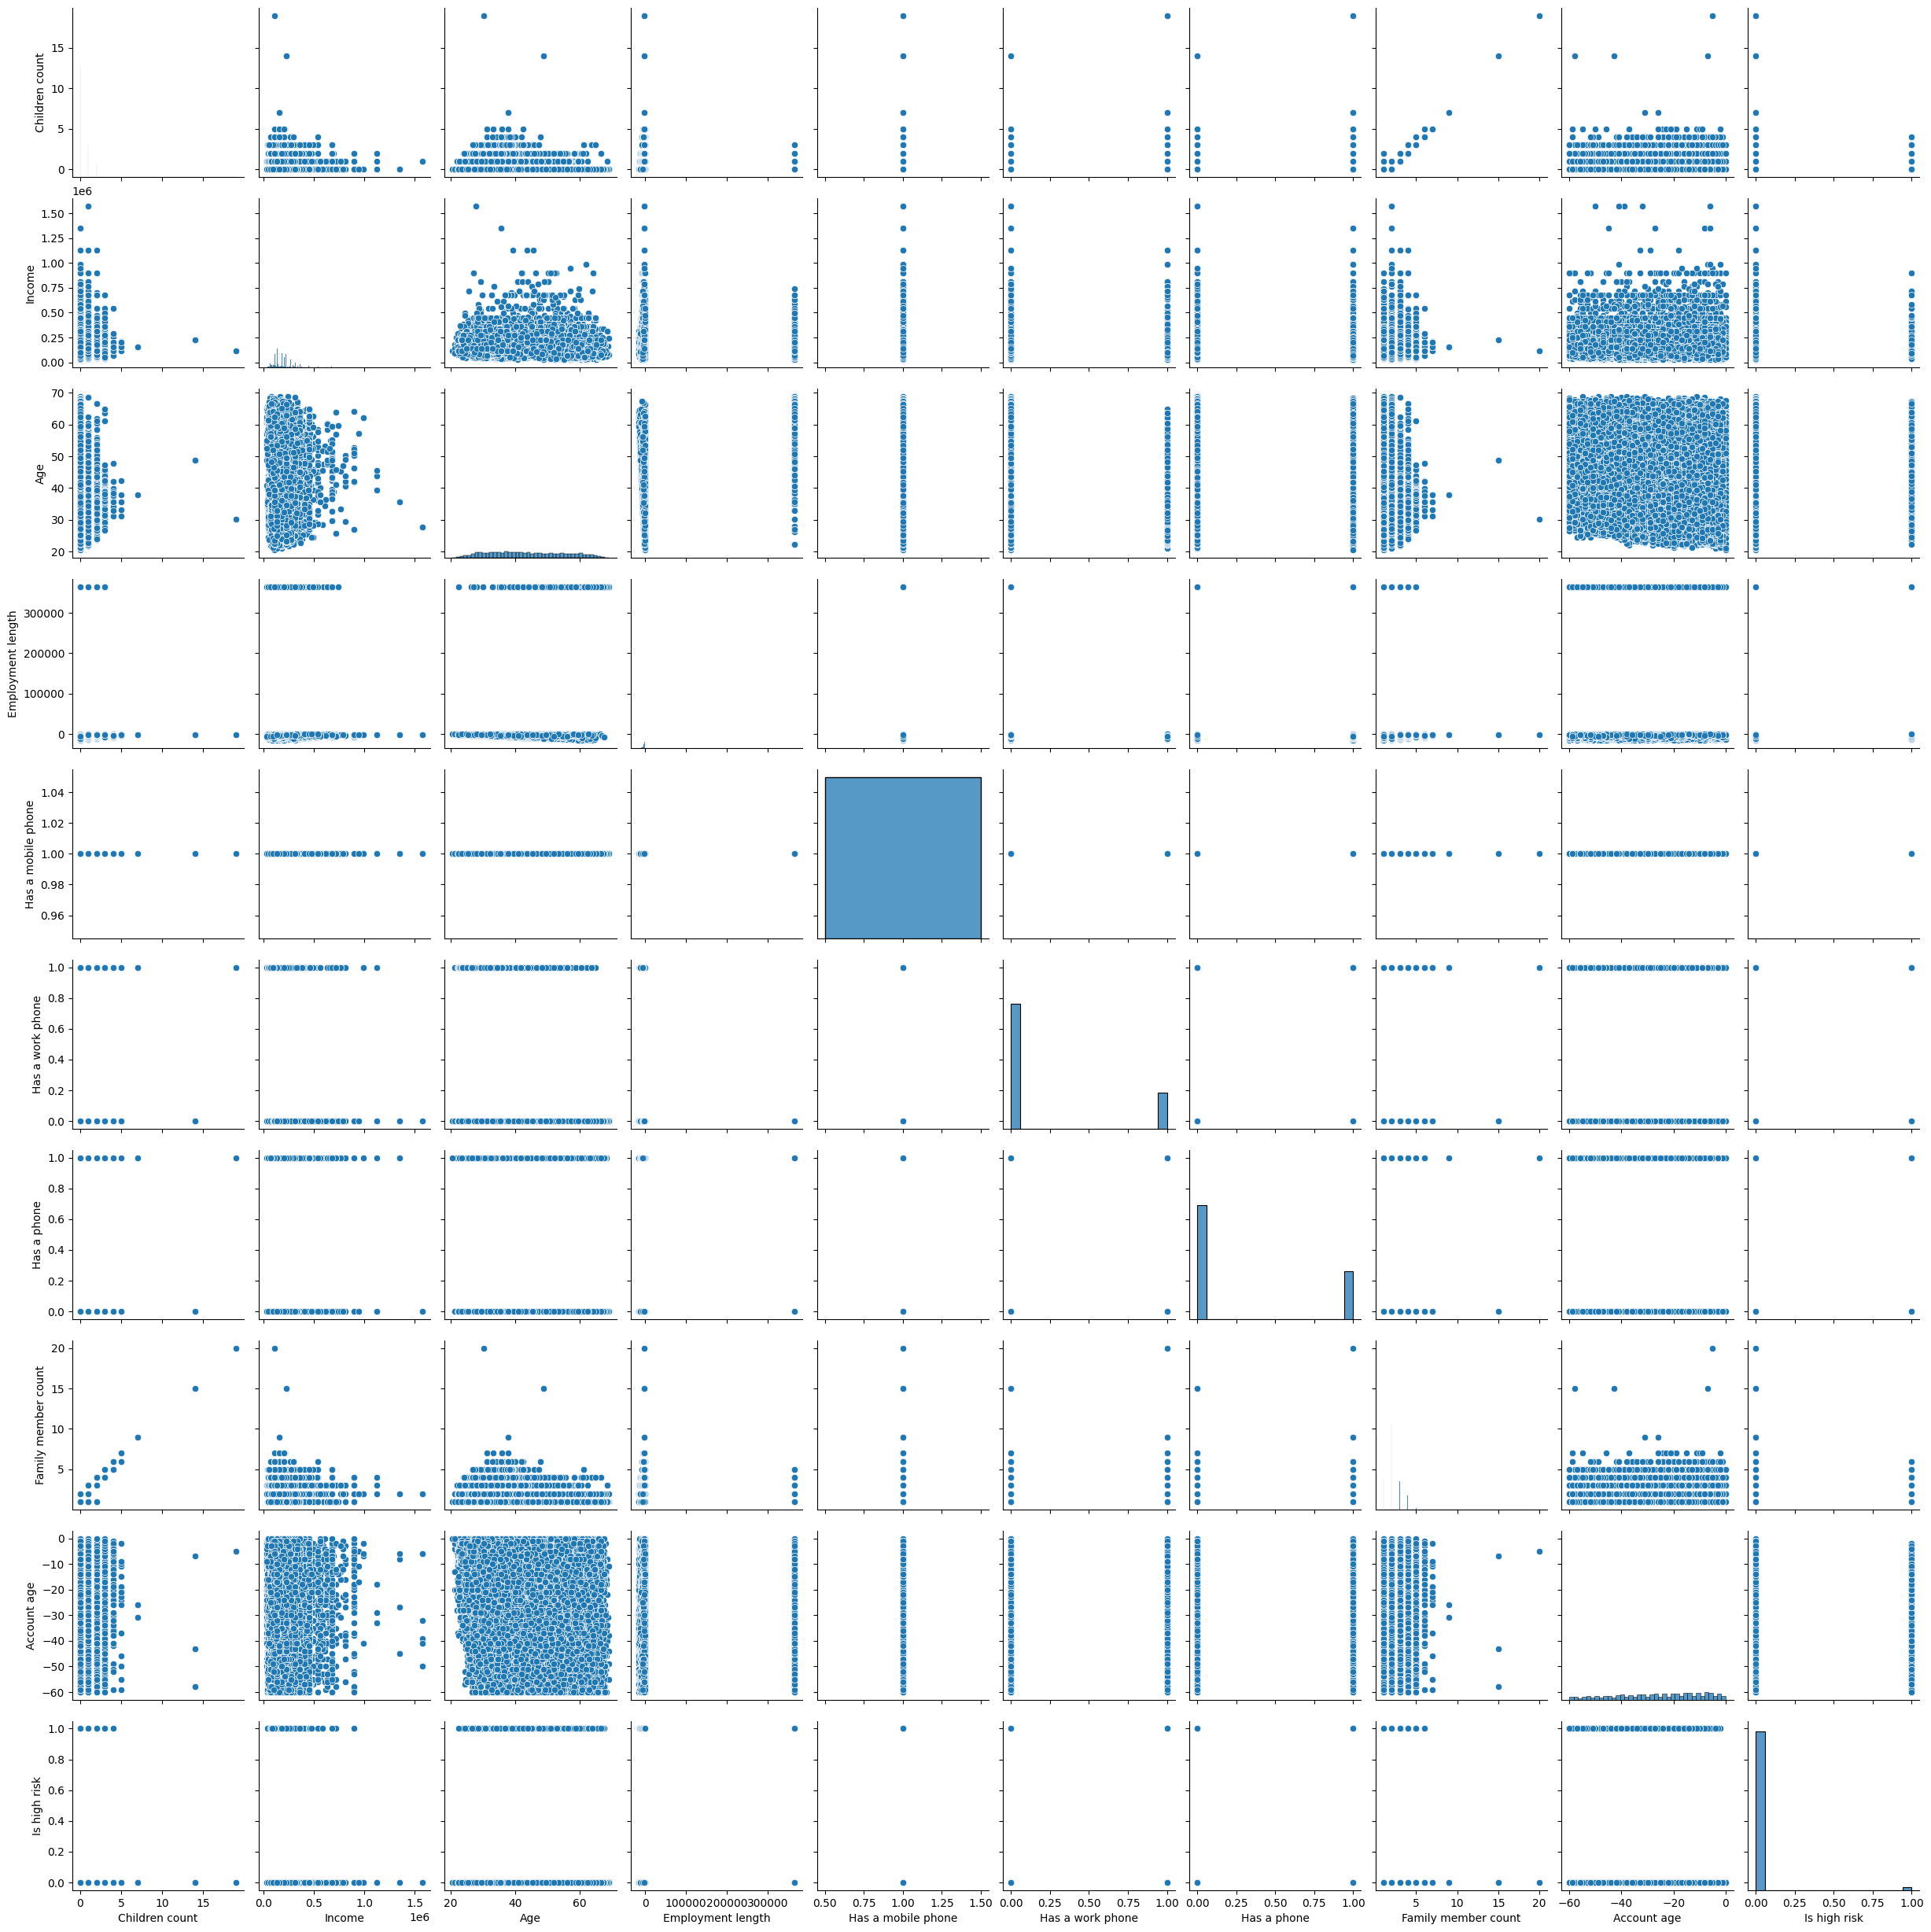

In [ ]:
data_numerical = data[['Children count', 'Income', 'Age', 'Employment length', 'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Family member count', 'Account age', 'Is high risk']]
sns.pairplot(data_numerical)
plt.show()

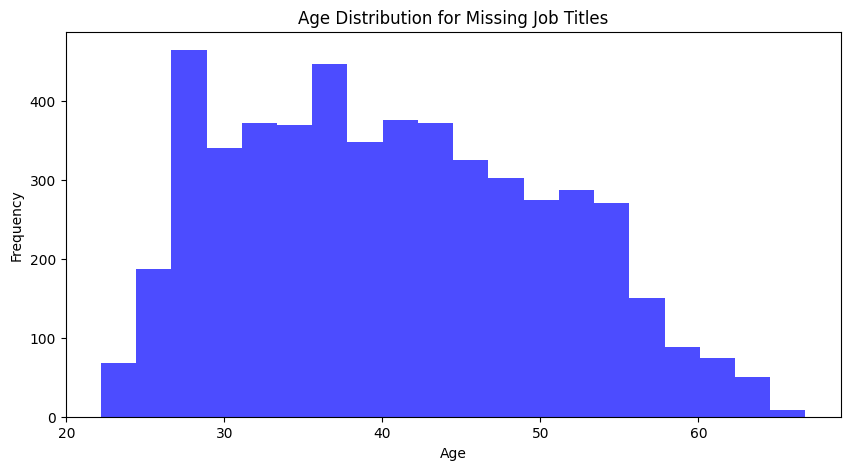

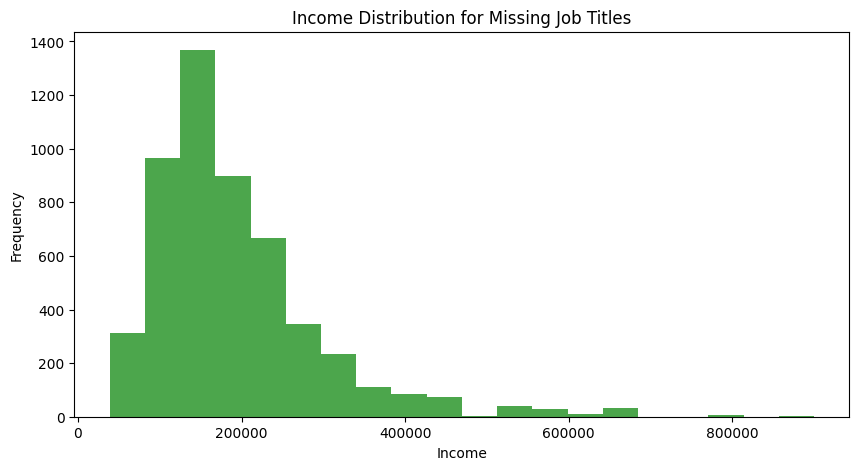

In [ ]:
# Age Distribution for records with missing Job Titles
plt.figure(figsize=(10, 5))
plt.hist(missing_job_title_df['Age'], bins=20, alpha=0.7, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Missing Job Titles')
plt.show()

# Income Distribution for records with missing Job Titles
plt.figure(figsize=(10, 5))
plt.hist(missing_job_title_df['Income'], bins=20, alpha=0.7, color='green')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution for Missing Job Titles')
plt.show()

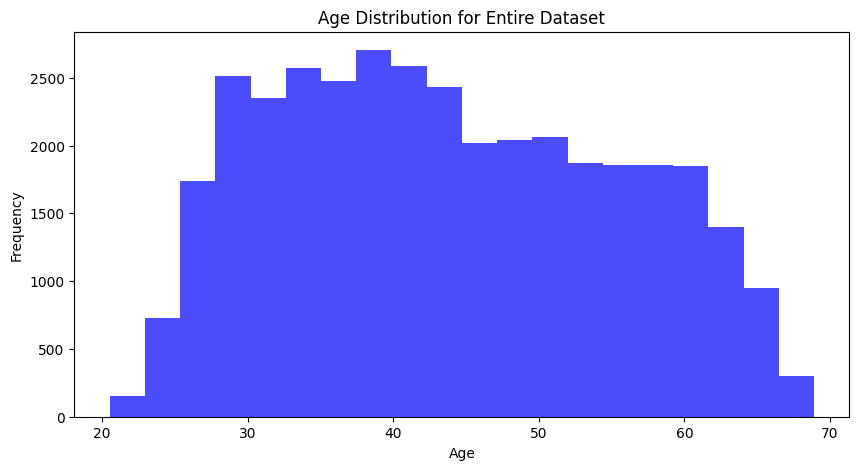

In [ ]:
# Age Distribution for entire dataset
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins=20, alpha=0.7, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Entire Dataset')
plt.show()

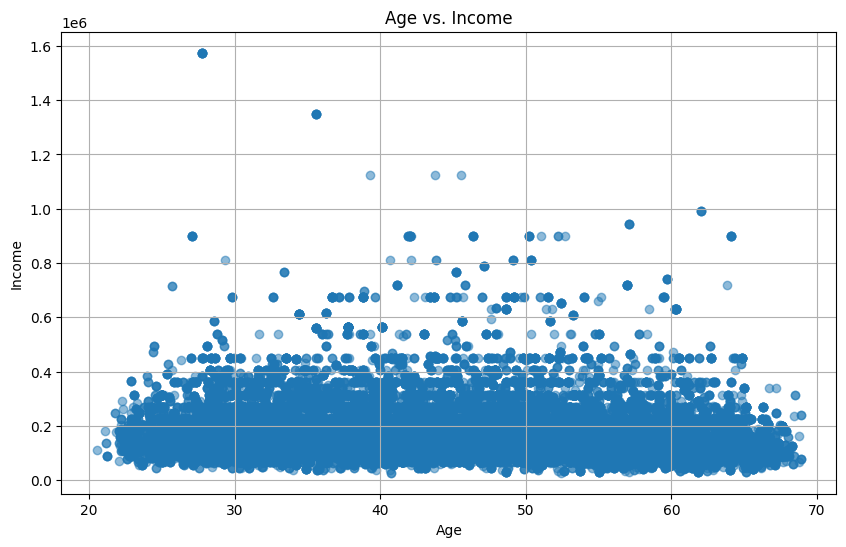

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.grid(True)
plt.show()

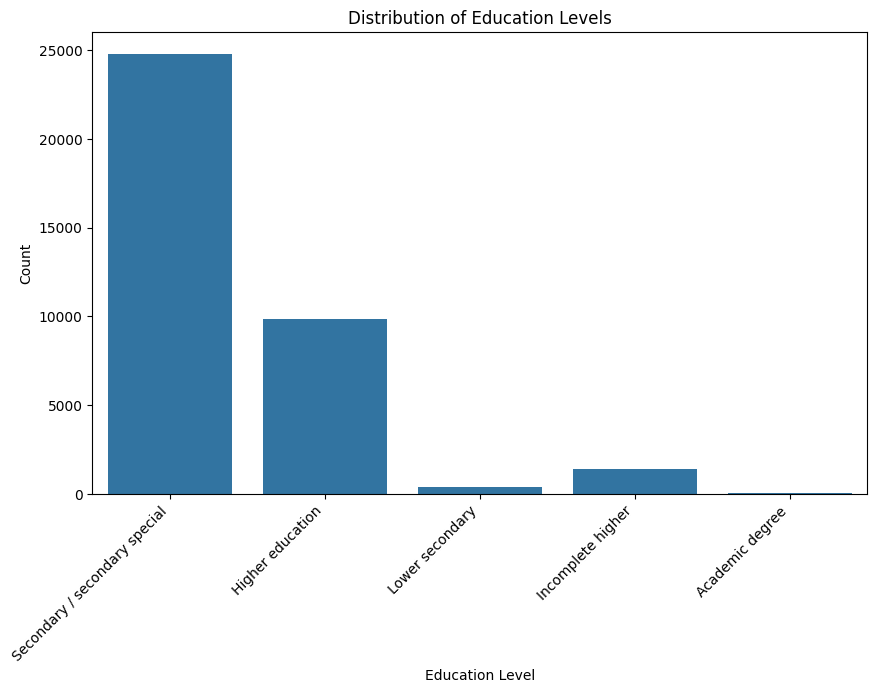

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education level', data=data)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##**Model Creation and Evaluation**

### **K-Nearest Neighbor**

Pipeline Creation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline # May have to switch
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

# Create X and y split
X = data.drop(columns=['Is high risk'])
y= data['Is high risk']

# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create pipeline
num_attribs = ['Income', 'Age', 'Family member count', 'Account age']
cat_attribs = ['Gender', 'Has a property', 'Children count', 'Marital status',
               'Job title']

preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ])

# Define under-sampling and over-sampling techniques
# Choosen based on the individual evaluation performance
under_sampler = ClusterCentroids(random_state=0)

# Define KNN classifier
# Decided to modify weights given the Under/Over Sampling methods
knn_model = KNeighborsClassifier(weights='distance')


# Define pipeline with explicit step names
knn_pipe = Pipeline([
    ('preprocessor', preprocess_pipeline),
    ('clustercentroids', under_sampler),
    ('knn', knn_model),
])

knn_model = knn_pipe.fit(X_train, y_train)

# Evaluate model
y_pred = knn_model.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Balanced Accuracy: 0.6617414409602319


Over Sampling and Under Sampling Methods

In [ ]:
from imblearn.under_sampling import ClusterCentroids
knn_pipe = make_pipeline(preprocess_pipeline, ClusterCentroids(random_state=0), KNeighborsClassifier(weights='distance'))
knn_pipe
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.6570288516387744


In [ ]:
from imblearn.over_sampling import ADASYN
knn_pipe = make_pipeline(preprocess_pipeline, ADASYN(random_state=0), KNeighborsClassifier(weights='distance'))
knn_pipe
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.622628253761963


#### **Other Methods Tried**

With KNN, we took the same approach as our other models. We first started with feature selection. Like many other iterations, this process was taking an extensive period and needed to be simplified. We eliminated a few features from start to help get to some efficiently running code, but we were still hitting a roadblock. Like the other models we took a hand selected feature selection approach to end up at the best functioning features using the correlation matrix above. With our features selected, we turned our attention towards balancing the dataset using over and under sampling methods. ADASYN and ClusterCentroids proved to be the two best models on their own when measure using balanced accuracy. Given this, we tried to incorporate both into a final pipeline. However, we noticed that using ClusterCentroids first ruled out any effect that ADASYN would have. We tried some manipulation of the sampling size for these sampling methods, but this still did not allow for ADASYN to have an effect. At this point we were getting a balanced accuracy score of around .63-.66 depending on which machine was running the code. We finally turned our attention towards search methods to tune the hyper-parameters. This is where the progress slowed down. Using GridSearch and RandomSearch proved ineffective as the results were all less effective than the model without any tuning. It was at this point we settled for the parameters we had to add to the stacked model we have at the end.

### **Logistic Regression**

Pipeline Creation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Create X and y split
X = data.drop(columns=['Is high risk'])
y= data['Is high risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


# Features to remove: Children count, Dwelling?, Account Age?
# Create pipeline
num_attribs = ['Income', 'Age', 'Account age']
cat_attribs = ['Gender', 'Has a car', 'Has a property',
               'Employment length', 'Education level', 'Marital status', 'Dwelling',
               'Job title']


preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ])

# For L1 regularization (Lasso)
logr_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, class_weight='balanced')

# For L2 regularization (Ridge)
logr_model = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced')

logr_pipe = make_pipeline(preprocess_pipeline, logr_model)

Random Search

In [ ]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from random import randint
import numpy as np

param_dist = {
    'logisticregression__C': np.logspace(-5, 3, num=10)
}

random_search = RandomizedSearchCV(logr_pipe,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='balanced_accuracy',
                                   random_state=0)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

y_pred_random = best_model_random.predict(X_test)
print("Accuracy:", balanced_accuracy_score(y_test, y_pred_random))

Accuracy: 0.7073953233604033


Grid Search

In [ ]:
# Grid Search- Best Balanced Accuracy
param_grid = {
       'logisticregression__C': [0.01, 0.1, 1, 10, 100],
       'logisticregression__penalty': ['l1', 'l2']
   }

grid_search = GridSearchCV(logr_pipe, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

y_pred = best_model_grid.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.7143896428502574


Bayes Search

In [ ]:
# Bayes Search
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_distribs = {
    'logisticregression__C': Real(1e-5, 1e3, prior='log-uniform'),
}

bayes_search = BayesSearchCV(logr_pipe,
                             param_distribs,
                             n_iter = 20,
                             cv=5,
                             optimizer_kwargs={'n_initial_points':5},
                             scoring='balanced_accuracy',
                             random_state=50)
bayes_search.fit(X_train, y_train)

best_params_bayes = bayes_search.best_params_
best_model_bayes = bayes_search.best_estimator_

y_pred_bayes = best_model_bayes.predict(X_test)
print("Accuracy:", balanced_accuracy_score(y_test, y_pred_bayes))

Accuracy: 0.7074650680946759


Over Sampling with SMOTE

In [ ]:
# SMOTE
!pip install imbalanced-learn

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Train-Test Split
X = data.drop(columns=['Is high risk'])
y = data['Is high risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Preprocessing
num_attribs = ['Income', 'Age', 'Account age']
cat_attribs = ['Gender', 'Has a car', 'Has a property',
               'Employment length', 'Education level', 'Marital status', 'Dwelling',
               'Job title']

preprocess_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_attribs),
    ("num", StandardScaler(), num_attribs),
])

# SMOTE & Pipeline
smote = SMOTE(random_state=0)
logr_model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2')

smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocess_pipeline),
    ('smote', smote),
    ('classifier', logr_model)
])

# Fit the pipeline with SMOTE
smote_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = smote_pipeline.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.7127855139619885


#### **Other Methods Tried**

For the Logistic Regression model, we tried three different search methods (grid search, random search, and bayesian optimization) to see which one had the highest balanced accuracy score. After exploring various hyperparameter tuning, we found that random search performed the best with a balanced accuracy of 0.72 (which we based our findings off of before having to run the model in our combined Colab file). Including lasso and ridge to help prevent overfitting and add a penalty to the model helped to produce this high balanced accuracy. We attempted lasso and ridge seperately, but the model ultimately performed the best using elastic net regression (combination). We then implemented a cost matrix to see if that would improve the results of the model even more, but it decreased the balanced accuracy by almost 10%, so we removed it. Next, for feature selection we tried both a backwards and recursive search, but only the recursive search would run in a timely manner. The results of this search showed that the optimal number of features was 34, with a balanced accuracy of 0.61. These results were very interesting to us because it excluded arguably the most impactful feature on credit card risk- income. After creating a new pipeline with these recursive search features and adjusting the hyperparameters, the best balanced accuracy we saw was 0.63. Based on these results, we decided to keep working with the features we chose based on intuition and knowledge of the dataset. The features that we chose ourselves were producing better results than the feature selection algorithms. Finally, we tried SMOTE to address the class imbalance in our dataset because the overwhelming majority is low risk. But, the result of this model was a balanced accuracy of 0.71, which was not better than the random search score. In conclusion, we decided to go with the Logistic Regression- Random Search as our best model because it produced the highest balanced accuracy to predict credit card risk. In the context of our business problem, it makes sense that Logistic Regression performed the best because it is great for binary outcomes (high vs low risk).

### **Random Forest Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")


# Create X and y split
data = data.drop('ID', axis=1)
X = data.drop(columns=['Is high risk'])
y= data['Is high risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create pipeline
num_attribs = ['Account age', 'Age', 'Income', 'Family member count']
cat_attribs = ['Education level', 'Gender','Employment length', 'Marital status']

preprocess_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ])

rf_pipe = make_pipeline(preprocess_pipeline, RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10	, min_samples_split=100, class_weight='balanced'))
rf_model = rf_pipe.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.676678721732119


In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = {
   'randomforestclassifier__max_depth':  [2, 10, 20, 50, 100],
    'randomforestclassifier__min_samples_leaf': [2, 10, 20, 50, 100],
    'randomforestclassifier__min_samples_split': [2, 5, 10, 20],
}

grid_search = GridSearchCV(rf_pipe, param_grid, cv=3, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

Best Parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5}


,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__min_samples_split,mean_test_score
41,20,2,5,0.630779
43,20,2,20,0.627628
42,20,2,10,0.625604
82,100,2,10,0.622418
21,10,2,5,0.622023


In [ ]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint

param_distributions = {
    'randomforestclassifier__max_depth': randint(1, 200),
    'randomforestclassifier__min_samples_leaf': randint(1, 200),
    "randomforestclassifier__class_weight": ["balanced", None]
}

randomized_search = RandomizedSearchCV(
    rf_pipe, param_distributions, n_iter=50, cv=3, scoring="balanced_accuracy", random_state=42, verbose=2, n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print("Best Parameters:", randomized_search.best_params_)
random_cv_res = pd.DataFrame(randomized_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 71, 'randomforestclassifier__min_samples_leaf': 9}


,param_randomforestclassifier__class_weight,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,mean_test_score
38,balanced,71,9,0.601840
31,balanced,48,15,0.561217
36,balanced,41,157,0.558446
49,balanced,101,175,0.556573
17,balanced,73,167,0.556573


In [ ]:
!pip install scikit-optimize  # For my Bayes search

In [ ]:
# Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Integer

param_bayes = {
    'randomforestclassifier__max_depth': Integer(2, 200),
    'randomforestclassifier__min_samples_leaf': Integer(2, 200)
}
bayes_search = BayesSearchCV(
    rf_pipe, param_bayes, n_iter=20, cv=3,
    optimizer_kwargs={'n_initial_points':10},
    scoring='balanced_accuracy', random_state=42)
bayes_search.fit(X_train, y_train)

# Show best parameters and score
print("Best parameters (Random Search):", bayes_search.best_params_)
bayes_search_result = pd.DataFrame(bayes_search.cv_results_)
bayes_search_result.sort_values(by="mean_test_score", ascending=False, inplace=True)
bayes_search_result.filter(regex = '(^param_|mean_test_score)', axis=1)

Best parameters (Random Search): OrderedDict([('randomforestclassifier__max_depth', 200), ('randomforestclassifier__min_samples_leaf', 2)])


,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,mean_test_score
11,200,2,0.625748
10,5,2,0.606939
12,198,11,0.586589
9,3,164,0.559046
1,168,177,0.556573
6,124,156,0.556496
8,191,141,0.556207
0,83,146,0.555544
7,110,184,0.555141
2,90,184,0.555141


#### **Other Methods Tried**

During the project, we explored various techniques to optimize the model and feature selection. This included trying balancing strategies such as SMOTE and ADASYN to address class imbalances, extracting feature importance to identify key predictors, and utilizing recursive feature elimination to systematically refine the feature set. We decided not to use them in the final model due to minimal improvements in performance or increased computational complexity.

### **Decision Trees (XGBoost)**

In [ ]:
# Load combined data

combined_data_path = 'https://drive.google.com/uc?export=download&id=1-3_wDiLgNwfj13U0-yAMa59yLm3Q6S48'  # Replace <file_id> with the actual file ID for combined_data.csv
combined_data = pd.read_csv(combined_data_path)

def preprocess_data(data):
    processed_data = data.copy()
    label_encoders = {}  # This will store label encoders for categorical columns

    # Example: Encode categorical features
    for column in data.select_dtypes(include=['object', 'category']):
        le = LabelEncoder()
        processed_data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

    # Return the processed dataset and the encoders
    return processed_data, label_encoders

# Preprocess the combined dataset
combined_data_preprocessed, label_encoders = preprocess_data(combined_data)


# Preprocess the combined dataset
combined_data_preprocessed, label_encoders = preprocess_data(combined_data)

# Split into features and target
X = combined_data_preprocessed.drop(columns=['Is high risk'])
y = combined_data_preprocessed['Is high risk']

# Split into training, validation, and test sets
X_train_split, X_temp, y_train_split, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split temp into validation and test sets (50% of 30% = 15% each for validation and test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display
X_train_split.head(), y_train_split.head(), X_val.head(), y_val.head(), X_test.head(), y_test.head()

(            ID  Gender  Has a car  Has a property  Children count    Income  \
 35911  5022718       1          0               1               0  157500.0   
 25551  5117064       0          0               1               0  180000.0   
 8762   5148780       0          1               1               0  225000.0   
 30683  5042285       0          0               1               0  157500.0   
 7970   5149627       1          1               1               0  382500.0   
 
        Employment status  Education level  Marital status  Dwelling    Age  \
 35911                  4                4               1         1  64.13   
 25551                  0                1               1         1  33.02   
 8762                   4                4               1         1  47.45   
 30683                  4                4               3         1  29.61   
 7970                   4                1               1         1  28.62   
 
        Employment length  Has a mobile ph

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_split, y_train_split)

# Display the new class distribution
class_distribution = Counter(y_train_balanced)
print(f"Class distribution after SMOTE: {class_distribution}")

# Train XGBoost model with balanced dataset
smote_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=1,  # With SMOTE, this can remain neutral
    tree_method='hist'
)
smote_model.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_val_pred_smote = smote_model.predict(X_val)
y_val_pred_proba_smote = smote_model.predict_proba(X_val)[:, 1]

# Metrics
smote_accuracy = accuracy_score(y_val, y_val_pred_smote)
smote_balanced_acc = balanced_accuracy_score(y_val, y_val_pred_smote)
smote_classification_report = classification_report(y_val, y_val_pred_smote)
smote_roc_auc = roc_auc_score(y_val, y_val_pred_proba_smote)

# Display performance
print("\nSMOTE XGBoost Model Performance:")
print(f"Accuracy: {smote_accuracy:.4f}")
print(f"Balanced Accuracy: {smote_balanced_acc:.4f}")
print("\nClassification Report:")
print(smote_classification_report)
print(f"ROC-AUC: {smote_roc_auc:.4f}")

Class distribution after SMOTE: Counter({0: 25088, 1: 25088})

SMOTE XGBoost Model Performance:
Accuracy: 0.9365
Balanced Accuracy: 0.5778

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5376
           1       0.06      0.21      0.10        92

    accuracy                           0.94      5468
   macro avg       0.53      0.58      0.53      5468
weighted avg       0.97      0.94      0.95      5468

ROC-AUC: 0.6910


Feature selection proved to be the most important step in coming up with the best performance for the model. We implemented feature selection based on an iterative method to evaluate each feature's performance. In the feature selection process, we applied the SMOTE-based balancing methods by iteratively dropping features and checking their influence concerning metrics such as accuracy, balanced accuracy, and ROC-AUC. Thus, we were able to obtain the most relevant features since we reduced the noise and redundancy of the dataset.

One feature of the dataset is class imbalance, with most of the samples from the non-high-risk classes. This dataset was balanced by SMOTE, the Synthetic Minority Over-sampling Technique. SMOTE is useful in generating artificial samples from the minority class and will make the model more generalized in nature for the prediction of high-risk cases.

As such, our pipeline highlighted the chosen features, the SMOTE balancing method, and XGBoost Classifier. This setup allowed us to leverage XGBoost efficiently in nature for structured data and class imbalance without adding significant computational overhead.

Threshold adjustment for classification was done as a means of bettering the model's balanced accuracy. The threshold for classification is decreased, in this case to 0.3, as a method of increasing sensitivity to high-risk cases. This adjustment of the threshold led to minor improvements in the balanced accuracy; however, the tradeoff between recall and precision remained difficult to navigate.

Notwithstanding the best efforts in feature selection, balancing the dataset, and threshold tuning, model performance was inherently limited by the imbalance and nature of features within the dataset. The final results were as follows:

Accuracy: 0.9365

Balanced Accuracy: 0.5778

ROC-AUC: 0.6910

The classification report reflected class imbalance: great performance for the majority class but low sensitivity on the minority class.


### **Ensembles**

In [ ]:
# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# preprocess the training data
tr_X = preprocess_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = preprocess_pipeline.transform(X_test)
t_y = y_test

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, class_weight='balanced')),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10	, min_samples_split=100, class_weight='balanced')),
        #('dt', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=5,learning_rate=0.1,tree_method='hist'))
    ], voting='hard'
)

voting_clf.fit(tr_X, tr_y)

for name, clf in voting_clf.named_estimators_.items():
    y_pred = clf.predict(t_X)
    bal_acc = balanced_accuracy_score(t_y, y_pred)
    print(f'Balanced Accuracy of {name}: {bal_acc:.4f}')

voting_pred = voting_clf.predict(t_X)
voting_bal_acc = balanced_accuracy_score(t_y, voting_pred)
print(f'Balanced Accuracy of Voting Classifier: {voting_bal_acc:.4f}')

Balanced Accuracy of lr: 0.7076
Balanced Accuracy of rf: 0.6767
Balanced Accuracy of Voting Classifier: 0.6725


In [ ]:
# Stacking
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tr_X = preprocess_pipeline.fit_transform(X_train)
tr_y = y_train

# preprocess the test data
t_X = preprocess_pipeline.transform(X_test)
t_y = y_test

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, class_weight='balanced')),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=100, class_weight='balanced')),
        ('dt', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=5, learning_rate=0.1)),
        ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='minkowski', algorithm='auto', leaf_size=30))
    ],
    final_estimator=LogisticRegression(class_weight='balanced', solver='liblinear'),
    cv=5,
    stack_method='predict_proba'
)


stacking_clf.fit(tr_X, tr_y)
stacking_pred = stacking_clf.predict(t_X)

stacking_bal_acc = balanced_accuracy_score(t_y, stacking_pred)
print(f'Stacking the four has a Balanced Accuracy of {stacking_bal_acc:.4f}')

Stacking the four has a Balanced Accuracy of 0.7236


**Voting vs Stacking**

The stacking classifier outperformed the voting classifier (0.7236 vs. 0.6725 balanced accuracy), likely due to its ability to leverage the strengths of all base models and refine predictions through the meta-model. While voting provides simplicity, stacking is more effective in combining diverse classifiers for this dataset.

##**Excluded Models**

**Support Vector Machine**

Initially we tried our hand at developing a Support Vector Machine in order to solve our classification problem. However, a model of this complexity was having a very difficult time getting results. The problems arose right from the start at feature selection where we could not get it to run in a short amount of time. We tried Backward Sequential Feature Selection and Recursive Feature Selection, both of which were taking upwards of 45+ minutes to run. After this, we tried to resample to just 4000 rows to speed up the feature selection process. Even this attempt to simplify the algorithm did not prove to be successful. There was just too much complexity amongst the many categorical columns of our data that a SVM was not going to be fast enough for the time we had on this project.

We did not bail entirely on the implemention of a SVM model just yet. Since we decided to go ahead and select features somewhat manually using the p-values we took from the correlation matrix, we attempted some hyper-parameter tuning using GridSearch and RandomSearch. In this segment we were able to get the algorithm to run slightly more effectively. However, it was still taking about 7-8 minutes to select parameters on very small grids and ranges. Moreover, the increase in the balanced accuracy score after tuning the hyper-parameters was marginal at best. Given the higher success of some of our other models, we made the decision to terminate the SVM and pursue the more successful pathways. We wanted to produce a higher quality result than getting stuck trying to implement many different models.


##**Conclusions**

**Analysis Conclusion**

Logistic regression was selected as the final model for predicting high-risk credit applicants due to its balance of accuracy, simplicity, and interpretability. After evaluating multiple algorithms, including stacking and Random Forest, logistic regression stood out for its lower computational cost, straightforward implementation, and ease of explaining results to stakeholders. To maximize its performance, we further optimized logistic regression using grid search and randomized search techniques, ensuring robust parameter selection. This model enables financial institutions to streamline the credit approval process, reduce default rates, and provide tailored products to low-risk applicants. Its transparency aligns with key priorities such as trust, regulatory compliance, and operational efficiency in financial services, making it a practical and impactful solution.

**Next Steps**

1) Cost function: A custom cost function will help align the model’s focus with real-world priorities, minimizing the most critical errors.

2) More enhanced feature selection- forward search. By doing this, we can identify the most relevant variables, improving the model's efficiency and interpretability.

3) Further exploration of models we had to stop due to time constraints. This exploration may uncover additional insights or yield higher predictive accuracy.

4) Create new features to advance our analysis (ex. Income over employment length). These features often capture nuanced relationships not apparent in raw data.

5) Incorporating external data sources (ex. location, credit card history). These factors can add context to credit risk predictions, as macroeconomic trends significantly influence borrower behavior.


##**Appendix**

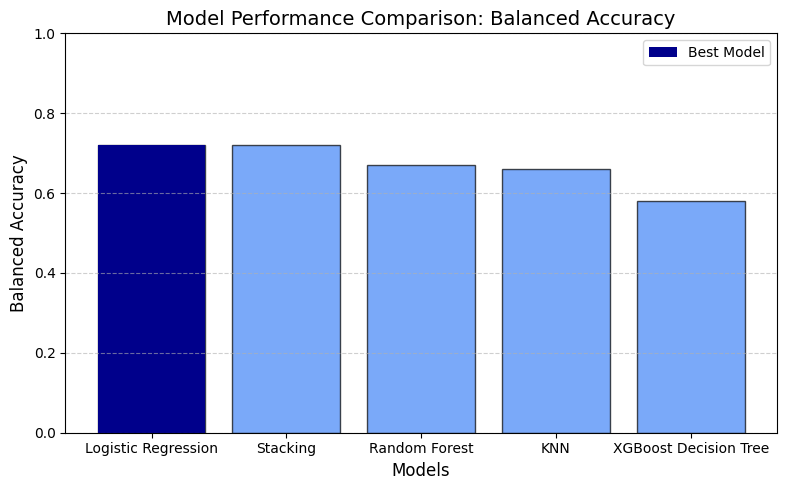

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your actual model performance metrics
models = ["Logistic Regression", "Stacking", "Random Forest", "KNN", "XGBoost Decision Tree"]
balanced_accuracy = [0.72, 0.72, 0.67, 0.66,  0.58]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, balanced_accuracy, alpha=0.7, color="#4285f7", edgecolor="black")
plt.title("Model Performance Comparison: Balanced Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Balanced Accuracy", fontsize=12)
plt.ylim(0, 1)  # Set y-axis range to fit the balanced accuracy range (0 to 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Highlight the best model
best_model_idx = balanced_accuracy.index(max(balanced_accuracy))
plt.bar(models[best_model_idx], balanced_accuracy[best_model_idx], color="darkblue", label="Best Model")
plt.legend(fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()


### References

Elbadry, Y. (n.d.). Credit Card Approval. Kaggle. Retrieved December 4, 2024, from https://www.kaggle.com/datasets/youssefelbadry10/credit-card-approval/data

### Generative AI Statement

For completing this portion of the Team Project, we utilized Generative AI functionalities in a handful of ways. Please see the description below for a detailed outline of how our group used the technology to facilitate the production of this project:

  > **Content Generation**: We used ChatGPT to brainstorm ideas and structure the initial outline of the project. It was also used to generate ideas for particular business problems and the types of visualizations that would be best for the different pieces of data.

  >**Research Assistance**: ChatGPT was used to quickly summarize our dataset so that we could understand what we were working with. Subsequently it was used as a search engine to understand the different types of alternative energy vehicles there are.

  >**Code Review and Debugging**: Both ChatGPT and Gemini were utilized in optimizing the performance of our code. These platforms were also used to efficiently deal with errors to keep the project moving forward. Lastly, these tools were used for quickly adopting the code for particular color patterns.

  >**Proofreading and Grammar Checks**: The built-in functionality of Word and Google Docs was used to make sure that spelling and grammar were accurate throughout the document.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.